# Elements as Ophyd Objects

## Prepare Bluesky and trigger a simulated Sirepo detector in SRW


Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:

In [8]:
from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, _ = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

%run -i _prepare_det_env.py

aperture.horizontalSize.kind = "hinted"  # noqa F821

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 2))  # noqa F821
hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))



Transient Scan ID: 1     Time: 2021-12-10 12:04:30
Persistent Unique Scan ID: '6f6993e1-0601-4a51-82b1-117db04dd283'
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.


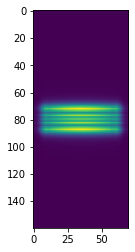

In [6]:
plt.imshow(w9_image[1])

In [ ]:
def test_beam_statistics_report_only(RE, db, shadow_tes_simulation):
    from sirepo_bluesky.sirepo_ophyd import create_classes

    classes, objects = create_classes(
        shadow_tes_simulation.data, connection=shadow_tes_simulation
    )
    globals().update(**objects)
    from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport

    bsr = BeamStatisticsReport(name="bsr", connection=shadow_tes_simulation)

    toroid.r_maj.kind = "hinted"  # noqa F821

    scan_range = (10_000, 50_000, 21)

    (uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))  # noqa F821
    hdr = db[uid]
    tbl = hdr.table()
    print(tbl)

    data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9
    print(f"Durations (seconds): {data}")

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(np.linspace(*scan_range)[1:], data)
    ax.set_ylabel("Duration of simulations [s]")
    ax.set_xlabel("Torus Major Radius [m]")
    title = (
        f"Shadow TES simulation\n"
        f"RE(bp.scan([bsr], toroid.r_maj, "
        f"{', '.join([str(x) for x in scan_range])}))"
    )
    ax.set_title(title)
    fig.savefig("TES-Shadow-timing.png")

We can access the data as the last item in the database (db[-1]), which when plotted as an image will look like:

Leading/trailing empty lines: